In [44]:
from __future__ import division
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from math import ceil,floor
import seaborn as sns

In [45]:
%matplotlib inline

In [109]:
df=pd.read_csv(r'C:\Users\ranbir\OneDrive - University of Stirling\IceRobotics\Data\20_07\20_07_3_day_window.csv',header='infer',dayfirst=True,parse_dates=True,infer_datetime_format=True)

In [110]:
df.dtypes

subject                 object
start                   object
mi                     float64
steps                  float64
Standing time          float64
lying time               int64
standing change        float64
actual calving date     object
calving time            object
stand state            float64
lying bouts            float64
dtype: object

In [111]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state,lying bouts
0,2609BL,06/06/2016 00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
1,2609BL,06/06/2016 00:15,10.0,0.0,0.0,900,2.0,08/06/2016,10:18:00,0.0,1.0
2,2609BL,06/06/2016 00:30,0.0,0.0,73.0,827,0.0,08/06/2016,10:18:00,0.0,0.0
3,2609BL,06/06/2016 00:45,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
4,2609BL,06/06/2016 01:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0


In [112]:
#delete lying bouts- was created while testing a formula in excel
del df['lying bouts']

In [113]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state
0,2609BL,06/06/2016 00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
1,2609BL,06/06/2016 00:15,10.0,0.0,0.0,900,2.0,08/06/2016,10:18:00,0.0
2,2609BL,06/06/2016 00:30,0.0,0.0,73.0,827,0.0,08/06/2016,10:18:00,0.0
3,2609BL,06/06/2016 00:45,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
4,2609BL,06/06/2016 01:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0


In [114]:
#calculate the lying bouts based on 'Stand Start' and number of transitions - 'standing change'
def lying_bouts(stdStart,stdChange):
    #case:lying down for the whole 15:00 mins
    if stdStart == 0:
        return floor(stdChange/2)
    elif stdStart == 1:
        return ceil(stdChange/2)
    else:
        return 0
        

In [115]:
print "0 initial, 0 transitions:",lying_bouts(0,0),"lying bouts"
print "1 initial, 0 transitions:",lying_bouts(1,0),"lying bouts"
print "0 initial, even transitions:",lying_bouts(0,4),"lying bouts"
print "0 initial, odd transitions:",lying_bouts(0,3),"lying bouts"
print "1 initial, even transitions:",lying_bouts(1,4),"lying bouts"
print "1 initial, odd transitions:",lying_bouts(1,3),"lying bouts"

0 initial, 0 transitions: 0.0 lying bouts
1 initial, 0 transitions: 0.0 lying bouts
0 initial, even transitions: 2.0 lying bouts
0 initial, odd transitions: 1.0 lying bouts
1 initial, even transitions: 2.0 lying bouts
1 initial, odd transitions: 2.0 lying bouts


In [116]:
df['lying bouts']=df.apply(lambda row:lying_bouts(row['stand state'],row['standing change']),axis=1)

In [117]:
#delete the standstate column as its not needed
del df['stand state']

In [118]:
#descriptive statistics to give an idea about the distribution of the data
df.describe()

,mi,steps,Standing time,lying time,standing change,lying bouts
count,28126.000000,28126.000000,28126.000000,28127.000000,28126.000000,28127.000000
mean,36.851028,9.832539,449.820486,450.195506,0.319313,0.159135
std,72.540206,20.696082,409.421952,409.423459,0.617356,0.384109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,459.000000,NaN,0.000000
75%,NaN,NaN,NaN,900.000000,NaN,0.000000
max,1219.000000,351.000000,900.000000,900.000000,9.000000,4.000000


In [119]:
#find instances with null values
df[pd.isnull(df['mi'])]
#drop null instances
df=df.dropna()
#check descriptive statistics again
df.describe()

,mi,steps,Standing time,lying time,standing change,lying bouts
count,28126.000000,28126.000000,28126.000000,28126.000000,28126.000000,28126.000000
mean,36.851028,9.832539,449.820486,450.179514,0.319313,0.159141
std,72.540206,20.696082,409.421952,409.421952,0.617356,0.384115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,2.000000,441.000000,459.000000,0.000000,0.000000
75%,46.000000,12.000000,900.000000,900.000000,1.000000,0.000000
max,1219.000000,351.000000,900.000000,900.000000,9.000000,4.000000


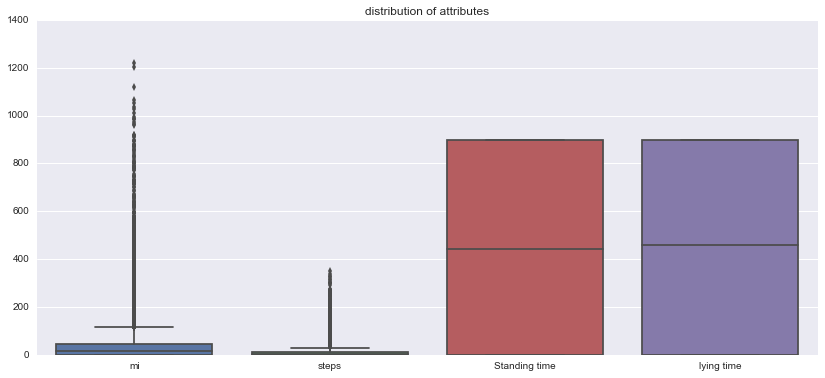

In [120]:
#box plots to show the distributions of attributes
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['mi','steps','Standing time','lying time']])
sns.plt.title('distribution of attributes')

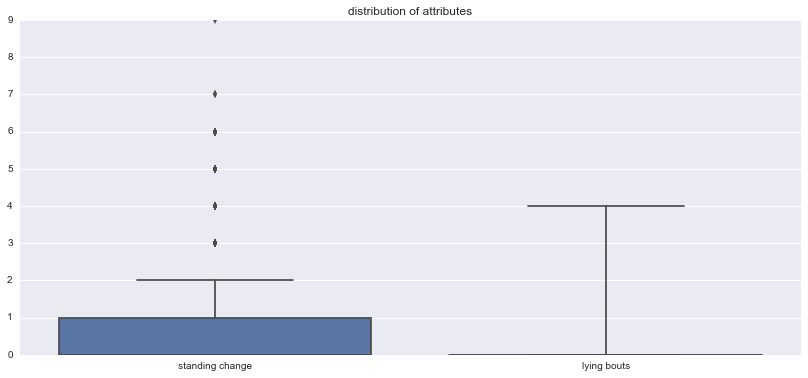

In [121]:
#box plots to show the distributions of attributes
plt.figure(figsize=(14,6))
sns.boxplot(data=df[['standing change','lying bouts']])
sns.plt.title('distribution of attributes')

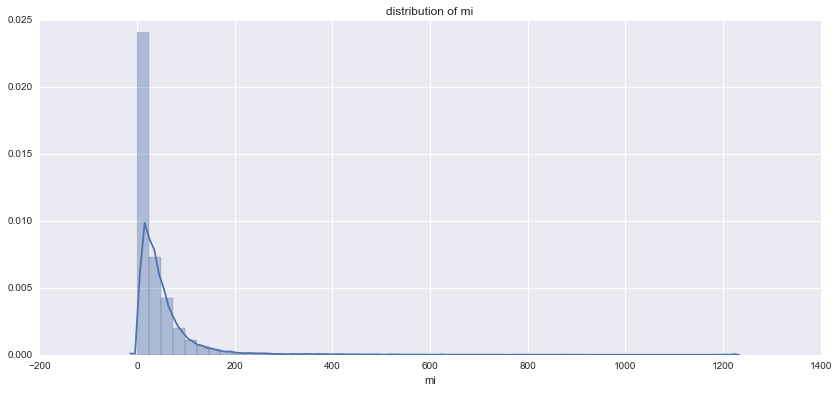

In [122]:
#distribution of mi
plt.figure(figsize=(14,6))
sns.distplot(df['mi'],kde=True,rug=False,)
sns.plt.title('distribution of mi')

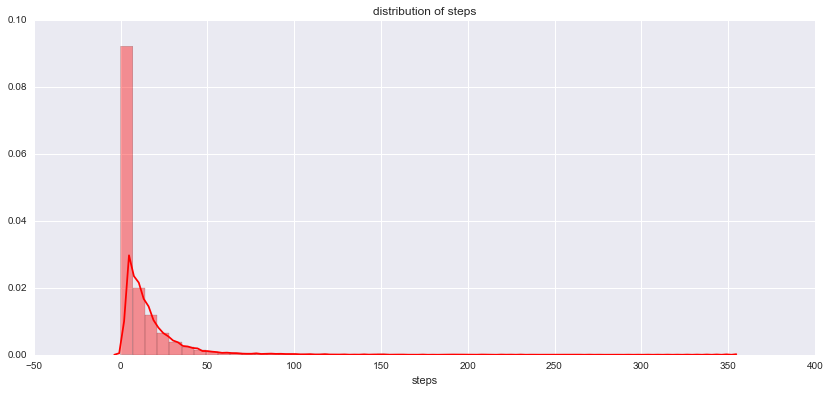

In [123]:
#distribution of steps
plt.figure(figsize=(14,6))
sns.distplot(df['steps'],kde=True,rug=False,color='red')
sns.plt.title('distribution of steps')

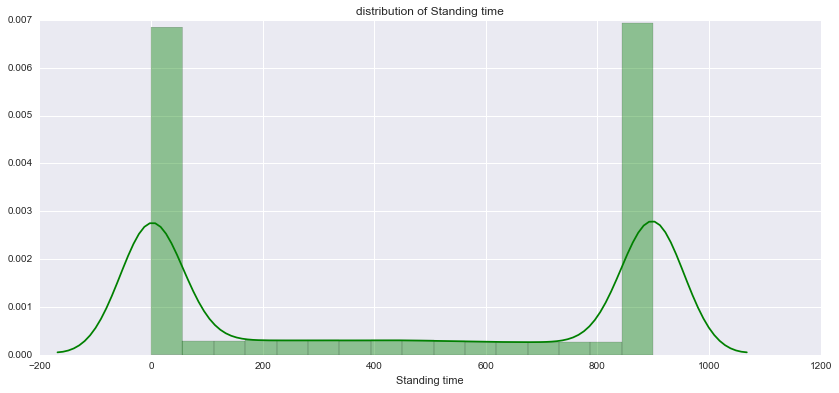

In [124]:
#distribution of standing time
plt.figure(figsize=(14,6))
sns.distplot(df['Standing time'],kde=True,rug=False,color='green')
sns.plt.title('distribution of Standing time')

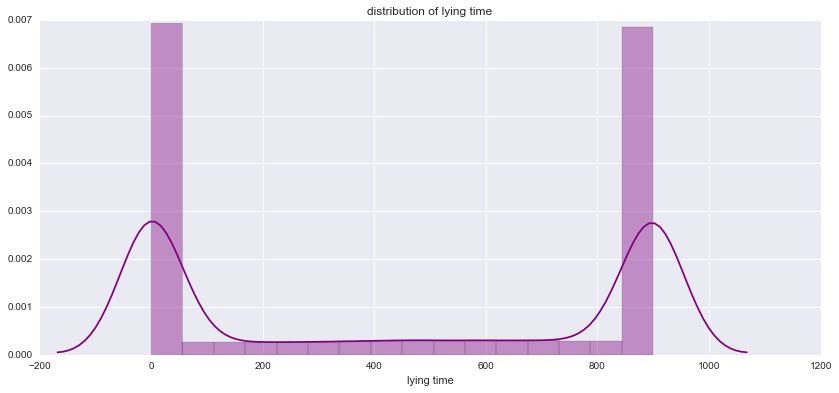

In [125]:
#distribution of lying time
plt.figure(figsize=(14,6))
sns.distplot(df['lying time'],kde=True,rug=False,color='purple')
sns.plt.title('distribution of lying time')

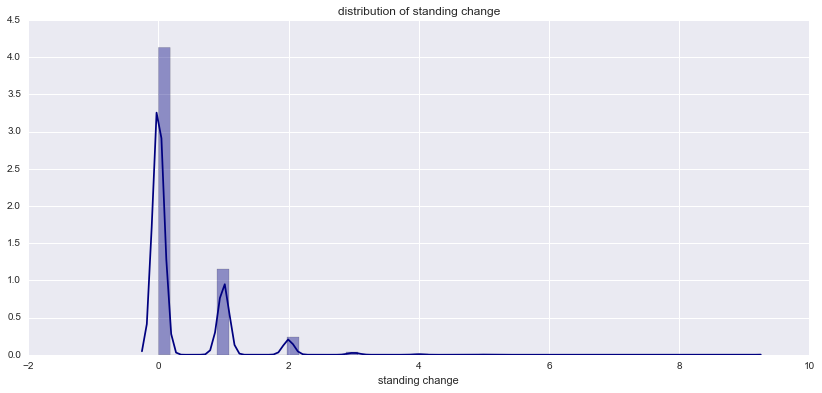

In [126]:
#distribution of lying time
plt.figure(figsize=(14,6))
sns.distplot(df['standing change'],kde=True,rug=False,color='navy')
sns.plt.title('distribution of standing change')

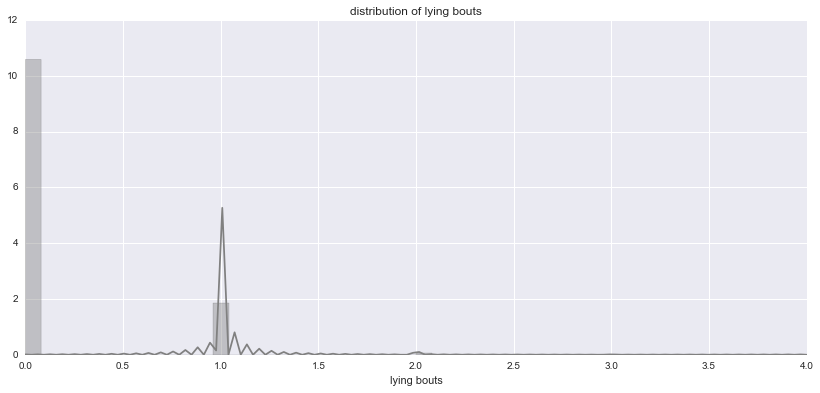

In [127]:
#distribution of lying time
plt.figure(figsize=(14,6))
sns.distplot(df['lying bouts'],kde=True,rug=False,color='grey')
sns.plt.title('distribution of lying bouts')

In [129]:
df['start']=pd.to_datetime(df['start'],format='%d/%m/%Y %H:%M')

In [130]:
df.dtypes

subject                        object
start                  datetime64[ns]
mi                            float64
steps                         float64
Standing time                 float64
lying time                      int64
standing change               float64
actual calving date            object
calving time                   object
lying bouts                   float64
dtype: object

In [131]:
df.describe()

,mi,steps,Standing time,lying time,standing change,lying bouts
count,28126.000000,28126.000000,28126.000000,28126.000000,28126.000000,28126.000000
mean,36.851028,9.832539,449.820486,450.179514,0.319313,0.159141
std,72.540206,20.696082,409.421952,409.421952,0.617356,0.384115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,2.000000,441.000000,459.000000,0.000000,0.000000
75%,46.000000,12.000000,900.000000,900.000000,1.000000,0.000000
max,1219.000000,351.000000,900.000000,900.000000,9.000000,4.000000


In [132]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,lying bouts
0,2609BL,2016-06-06 00:00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
1,2609BL,2016-06-06 00:15:00,10.0,0.0,0.0,900,2.0,08/06/2016,10:18:00,1.0
2,2609BL,2016-06-06 00:30:00,0.0,0.0,73.0,827,0.0,08/06/2016,10:18:00,0.0
3,2609BL,2016-06-06 00:45:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
4,2609BL,2016-06-06 01:00:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0


In [134]:
df.to_excel('lyingbouts25_07.xlsx')

In [135]:
df=df.set_index('start')

In [136]:
print df.index

DatetimeIndex(['2016-06-06 00:00:00', '2016-06-06 00:15:00',
               '2016-06-06 00:30:00', '2016-06-06 00:45:00',
               '2016-06-06 01:00:00', '2016-06-06 01:15:00',
               '2016-06-06 01:30:00', '2016-06-06 01:45:00',
               '2016-06-06 02:00:00', '2016-06-06 02:15:00',
               ...
               '2016-05-18 21:15:00', '2016-05-18 21:30:00',
               '2016-05-18 21:45:00', '2016-05-18 22:00:00',
               '2016-05-18 22:15:00', '2016-05-18 22:30:00',
               '2016-05-18 22:45:00', '2016-05-18 23:00:00',
               '2016-05-18 23:15:00', '2016-05-18 23:30:00'],
              dtype='datetime64[ns]', name=u'start', length=28126, freq=None)


In [137]:
df_hourly=df.groupby('subject').resample('1H',how='sum')
df_hourly.head()

mi  steps  Standing time  lying time  \
subject start                                                         
112BL   2015-08-16 00:00:00   0.0    0.0          881.0        2719   
        2015-08-16 01:00:00  54.0   13.0         1175.0        2425   
        2015-08-16 02:00:00  33.0    9.0          428.0        3172   
        2015-08-16 03:00:00  19.0    4.0          341.0        3259   
        2015-08-16 04:00:00   7.0    1.0          739.0        2861   

                             standing change  lying bouts  
subject start                                              
112BL   2015-08-16 00:00:00              0.0          0.0  
        2015-08-16 01:00:00              2.0          1.0  
        2015-08-16 02:00:00              2.0          1.0  
        2015-08-16 03:00:00              2.0          1.0  
        2015-08-16 04:00:00              1.0          0.0

In [138]:
#data types for dataframe df_hourly
print df_hourly.index.name

None


In [139]:
#index for dataframe df_hourly
df_hourly.head()

mi  steps  Standing time  lying time  \
subject start                                                         
112BL   2015-08-16 00:00:00   0.0    0.0          881.0        2719   
        2015-08-16 01:00:00  54.0   13.0         1175.0        2425   
        2015-08-16 02:00:00  33.0    9.0          428.0        3172   
        2015-08-16 03:00:00  19.0    4.0          341.0        3259   
        2015-08-16 04:00:00   7.0    1.0          739.0        2861   

                             standing change  lying bouts  
subject start                                              
112BL   2015-08-16 00:00:00              0.0          0.0  
        2015-08-16 01:00:00              2.0          1.0  
        2015-08-16 02:00:00              2.0          1.0  
        2015-08-16 03:00:00              2.0          1.0  
        2015-08-16 04:00:00              1.0          0.0

In [140]:
df_hourly.describe()

,mi,steps,Standing time,lying time,standing change,lying bouts
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000
mean,146.892290,39.193594,1793.034439,1794.465561,1.272817,0.634354
std,223.630571,64.710003,1330.526078,1328.462138,1.427374,0.788168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,4.000000,474.000000,431.750000,0.000000,0.000000
50%,91.000000,22.000000,1753.500000,1829.000000,1.000000,1.000000
75%,184.000000,50.000000,3152.250000,3097.000000,2.000000,1.000000
max,3457.000000,1054.000000,3600.000000,3600.000000,17.000000,9.000000


In [141]:
#export out hourly intervals to csv
df_hourly.to_csv('hourly interval_25_07.csv')

In [142]:
#show all cows with one or more sensors
levels=df_hourly.index.levels[0]
cows = set([cow[:-2] for cow in levels])
print cows

set(['2778', '2710', '2614', '2715', '137', '2949', '112', '2802', '6436', '20', '2206', '2741', '2743', '2157', '2745', '2661', '9', '812', '2726', '202', '207', '208', '2879', '2609', '1950', '126', '127', '801', '2573', '2753', '2141', '6692', '2790', '2794'])


In [143]:
#select 3 random cows to plot
import random
cows = random.sample([cow[:-2] for cow in levels],3)
print cows

['2802', '112', '137']


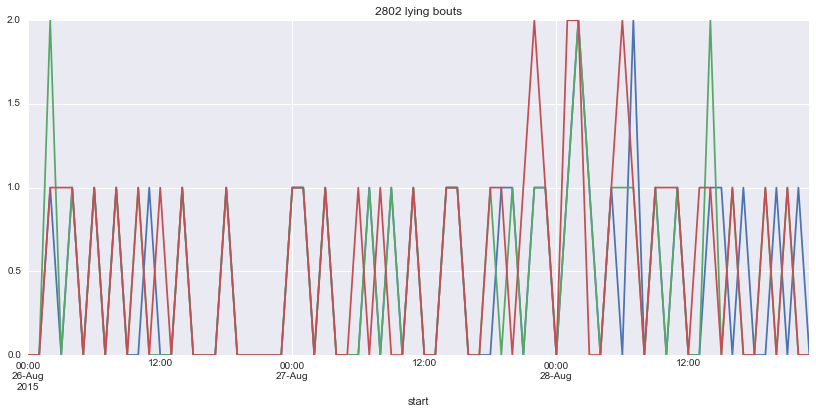

In [172]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'lying bouts'].plot(title=str(level[:-2])+' lying bouts',label=str(level))

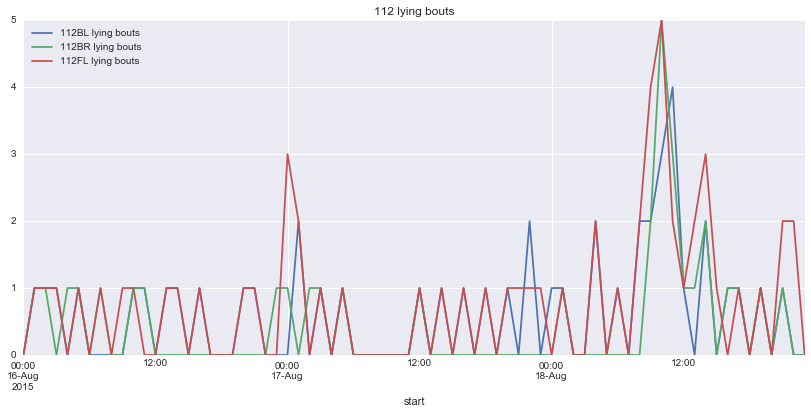

In [178]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level,'lying bouts'].plot(title=str(level[:-2])+' lying bouts',label=str(level)+' lying bouts')
plt.legend(loc='upper left')
        

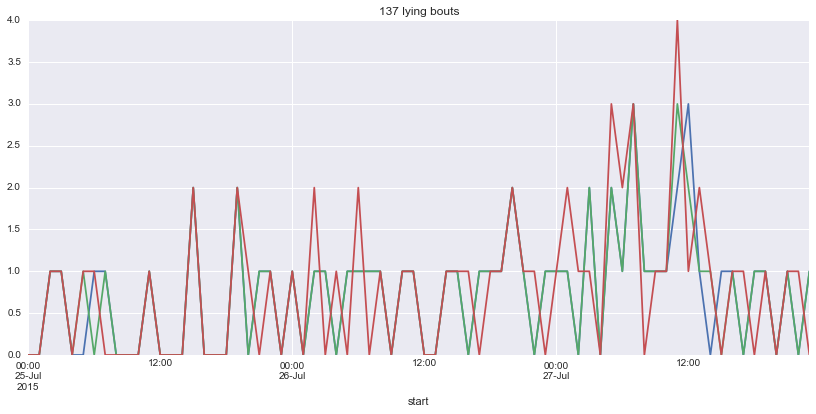

In [147]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'lying bouts'].plot(title=str(level[:-2])+' lying bouts')

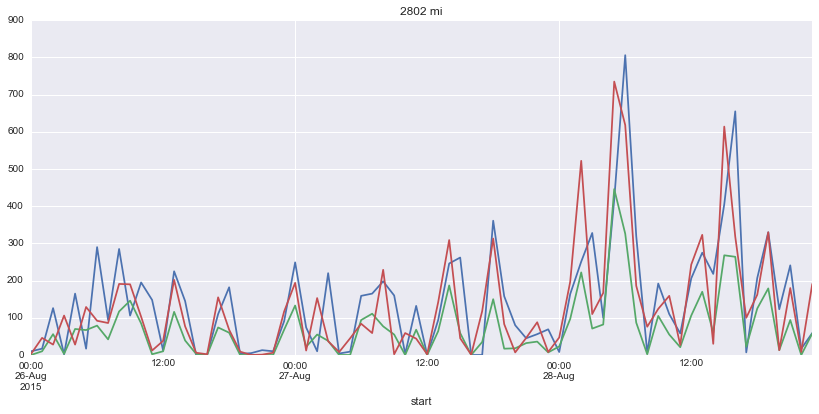

In [151]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'mi'].plot(title=str(level[:-2])+' mi')

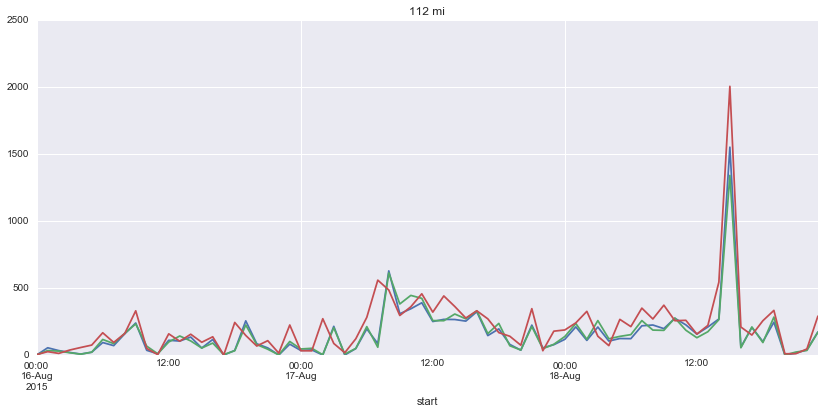

In [152]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
count = 0
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level,'mi'].plot(title=str(level[:-2])+' mi')

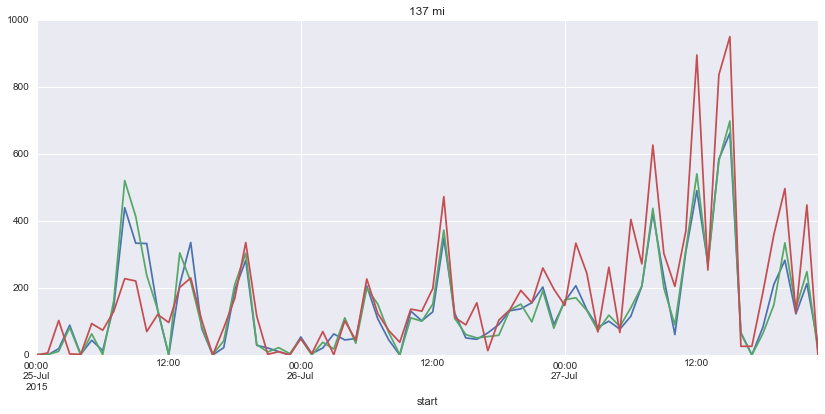

In [158]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'mi'].plot(title=str(level[:-2])+' mi')

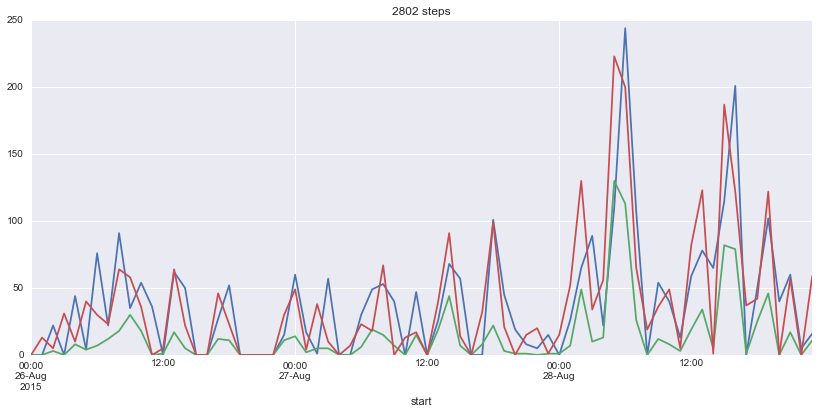

In [159]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'steps'].plot(title=str(level[:-2])+' steps')

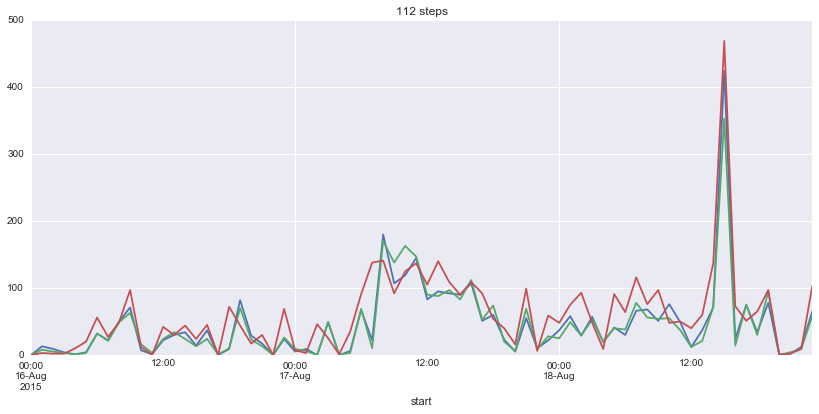

In [160]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level,'steps'].plot(title=str(level[:-2])+' steps')

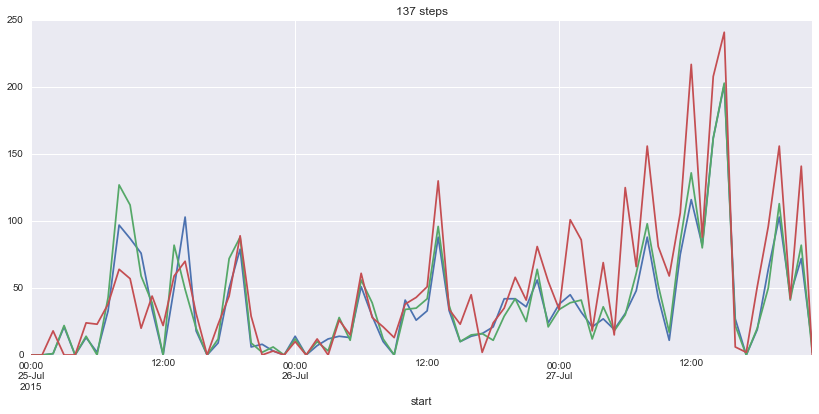

In [161]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'steps'].plot(title=str(level[:-2])+' steps')

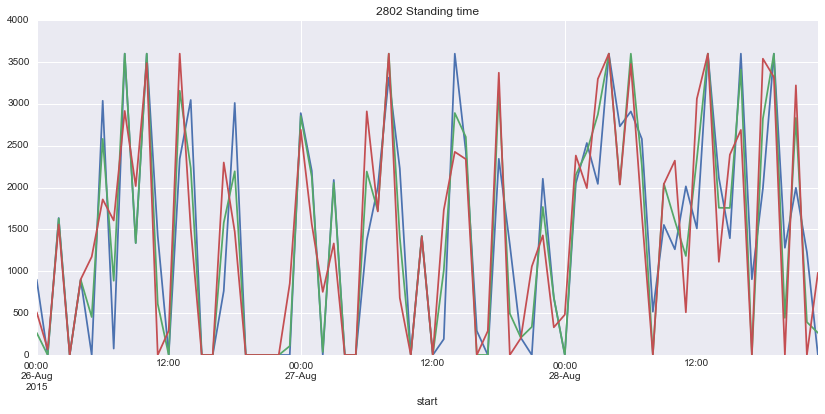

In [162]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'Standing time'].plot(title=str(level[:-2])+' Standing time')

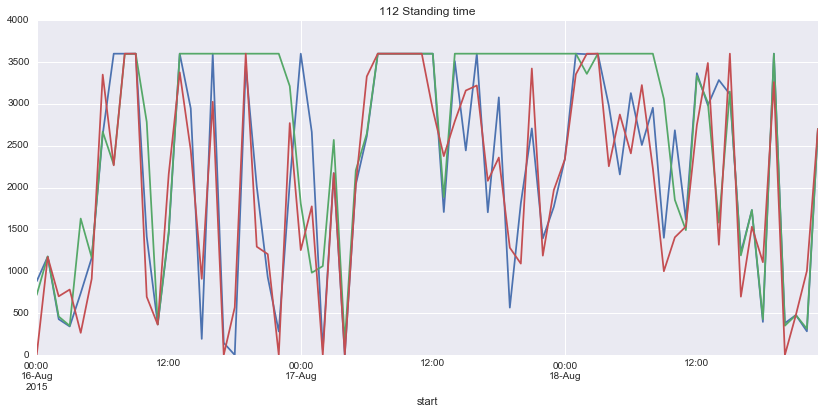

In [163]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level, 'Standing time'].plot(title=str(level[:-2])+' Standing time')

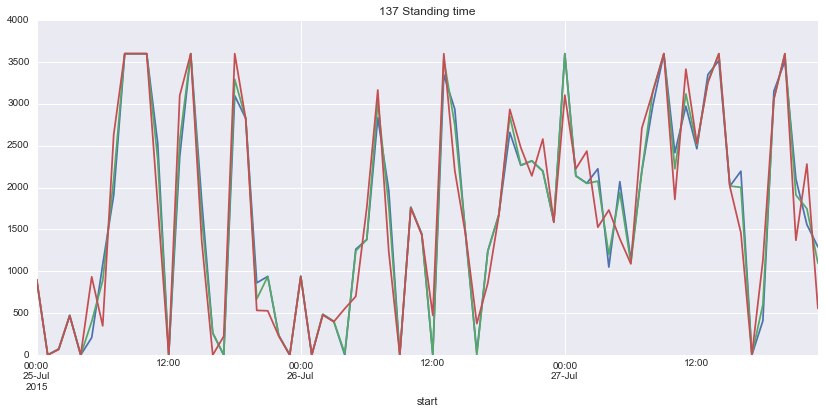

In [164]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'Standing time'].plot(title=str(level[:-2])+' Standing time')

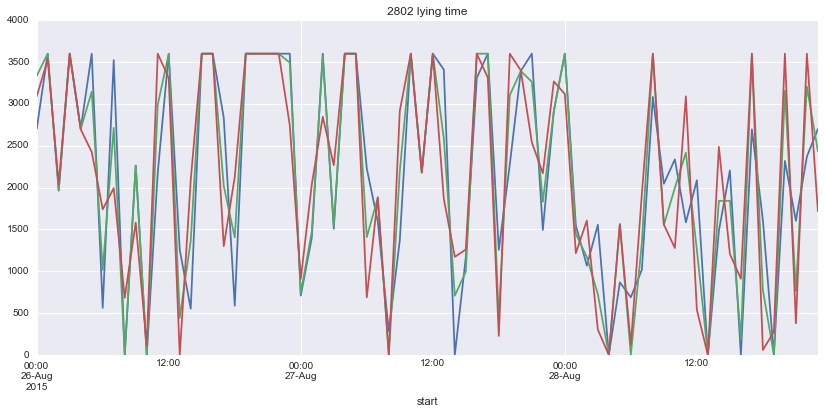

In [168]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'lying time'].plot(title=str(level[:-2])+' lying time')

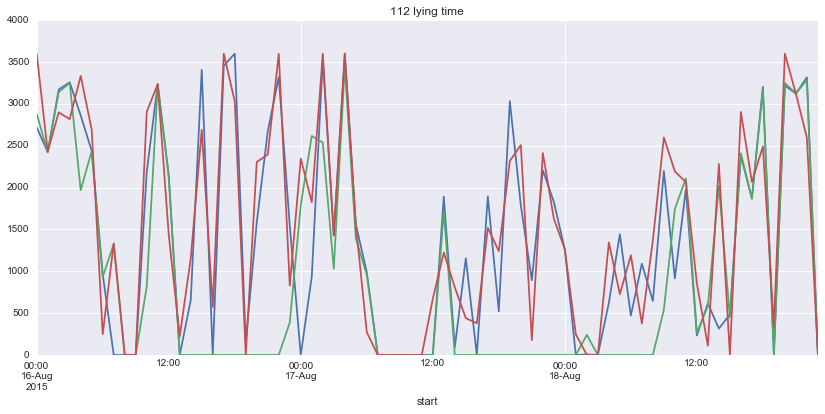

In [169]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level,'lying time'].plot(title=str(level[:-2])+' lying time')

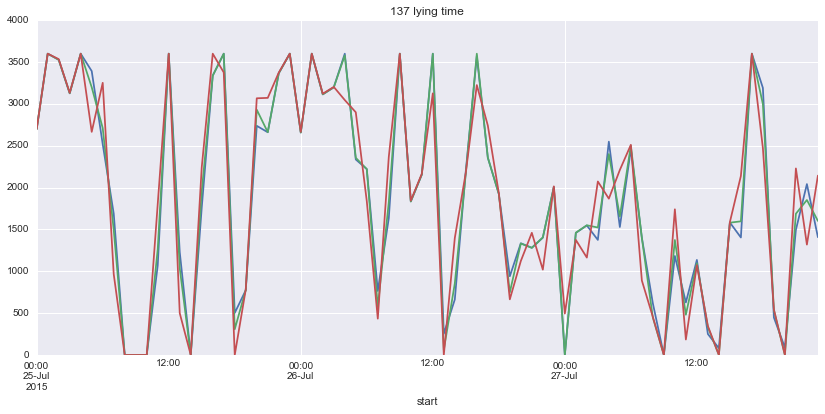

In [170]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'lying time'].plot(title=str(level[:-2])+' lying time')

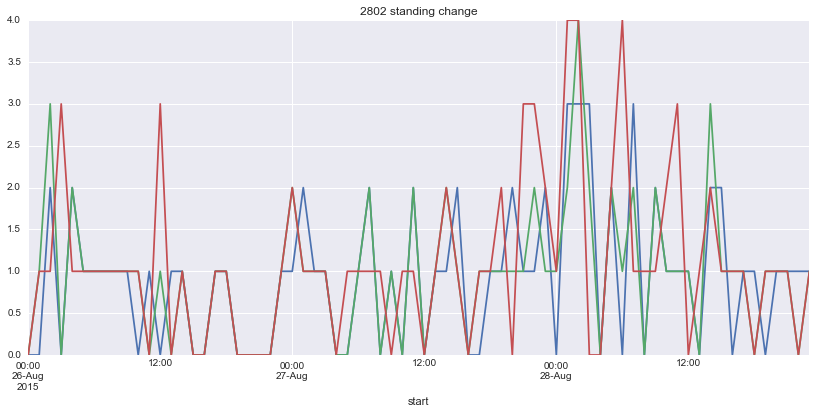

In [165]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[0],level):
        df_hourly.loc[level,'standing change'].plot(title=str(level[:-2])+' standing change')

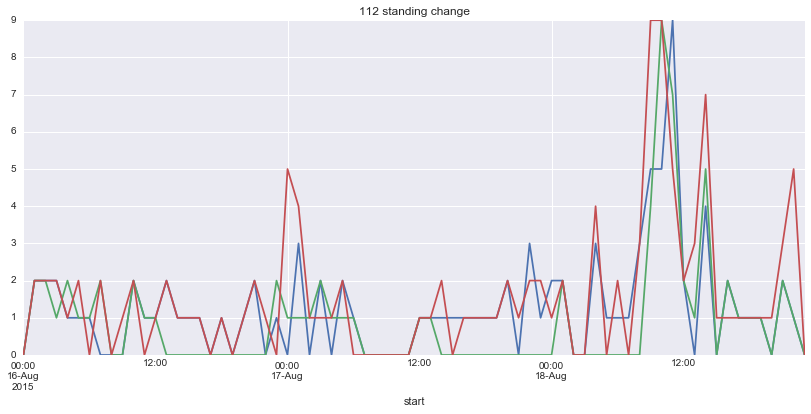

In [166]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[1],level):
        df_hourly.loc[level,'standing change'].plot(title=str(level[:-2])+' standing change')

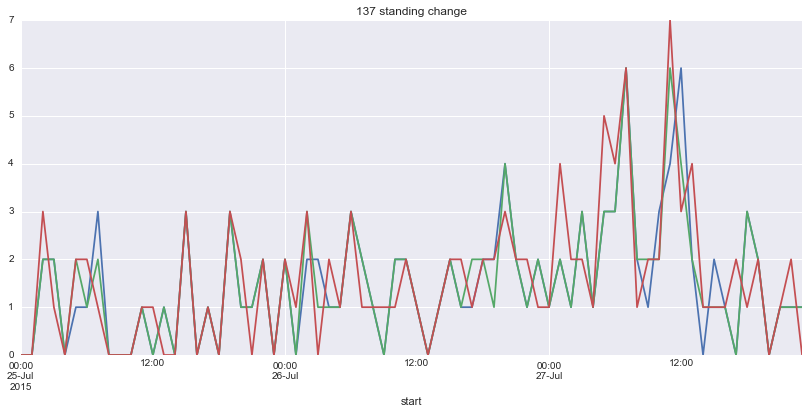

In [167]:
#plot 1 attribute per chart for a sample cow- irrespective of number of sensors attached
levels=df_hourly.index.levels[0]
import re
plt.figure(figsize=(14,6))
for level in levels:
    if re.search(cows[2],level):
        df_hourly.loc[level,'standing change'].plot(title=str(level[:-2])+' standing change')